### Import the relevant libraries

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

### Loading the dataset from parent directory

In [2]:
current_directory = os.getcwd()

# Specify the path to the CSV file in the parent directory
csv_file_path = os.path.join(current_directory, 'Twitter_Full.csv')

In [3]:
df = pd.read_csv(csv_file_path, sep=';')
df

,text,hashtags,labels,Unnamed: 3,Unnamed: 4
0,Being s mom is cleaning 24/7 the same shit ove...,"['momlife', 'kids', 'tired']",1,NaN,NaN
1,And now we have been given the walkthru book b...,['walkthru'],0,NaN,NaN
2,Wishing YOU Peace Joy & Love! JoyTrain MentalH...,"['Peace', 'Joy', 'Love', 'JoyTrain', 'MentalHe...",0,NaN,NaN
3,speak-no-evil monkey Can I Be Honest With You...,"['therapy', 'help', 'NLP', 'CBT', 'hypnotherap...",1,NaN,NaN
4,Psy Do u hv any regrets? Me No Psy Are you hap...,[],0,NaN,NaN
...,...,...,...,...,...
8895,Thank you for all your business questions toda...,"['business', 'business', 'Stress', 'mind', 'bo...",0,NaN,NaN
8896,Who is planning on walking their minds today?!...,"[""'walkthemind'"", ""'walking'"", ""'walk'"", ""'hik...",1,NaN,NaN
8897,no mobile phones Three Tips to Reduce Technos...,"['m1hl', 'stress', 'technostress', 'tips']",1,NaN,NaN
8898,purple heart Day 1 purple heart But vets firs...,"['DogsofTwittter', 'shout', 'getoutforshout', ...",1,NaN,NaN


### Summary table of the dataset

In [4]:
df.describe(include='all')

,text,hashtags,labels,Unnamed: 3,Unnamed: 4
count,8897,8892,8900.000000,0.0,0.0
unique,8436,5570,NaN,NaN,NaN
top,Contact or Whatsapp +91 7034 090 090 yoga medi...,[],NaN,NaN,NaN
freq,21,1242,NaN,NaN,NaN
mean,NaN,NaN,0.509438,NaN,NaN
std,NaN,NaN,0.499939,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,1.000000,NaN,NaN
75%,NaN,NaN,1.000000,NaN,NaN


### Dropping irrelevant rows and columns

In [5]:
# Droping rows where hashtags are empty
df.drop(df[df['hashtags'] == "[]"].index, inplace=True)

# Reseting the index
df.reset_index(drop=True, inplace=True)

In [6]:
df.drop(columns=['Unnamed: 3','Unnamed: 4'], axis=1, inplace=True)
df.dropna(inplace=True)

df.describe(include='all')

,text,hashtags,labels
count,7647,7647,7647.000000
unique,7228,5566,NaN
top,Contact or Whatsapp +91 7034 090 090 yoga medi...,['excited'],NaN
freq,21,180,NaN
mean,NaN,NaN,0.497712
std,NaN,NaN,0.500027
min,NaN,NaN,0.000000
25%,NaN,NaN,0.000000
50%,NaN,NaN,0.000000
75%,NaN,NaN,1.000000


### Checking null values

In [7]:
df.isnull().sum()

text        0
hashtags    0
labels      0
dtype: int64

### Creating a visual graph to see the proportion of stressed and unstressed people in the dataset

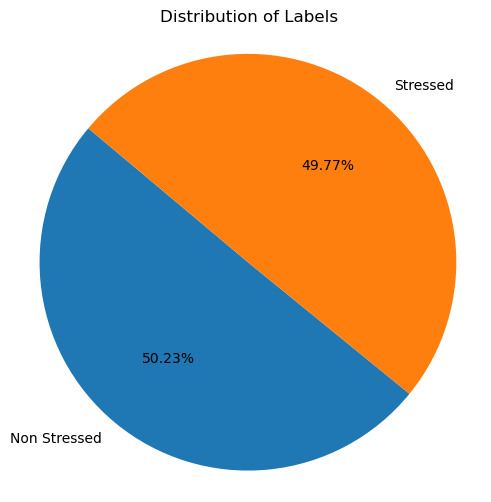

In [8]:
label_counts = df['labels'].value_counts()

label_counts.index = ['Stressed' if i == 1 else 'Non Stressed' for i in label_counts.index]

# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(label_counts, labels=label_counts.index, autopct='%1.2f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Labels')
plt.show()

In [9]:
print(f'The number of stressed people in the dataset is {label_counts[1]}')
print(f'The number of people who are not stressed in the dataset is {label_counts[0]}')

The number of stressed people in the dataset is 3806
The number of people who are not stressed in the dataset is 3841


### Defining a function to print word cloud to see which word appears the most in the article for stressed and unstressed

In [10]:
def wordCloud(col, label_value):
    # Filter the DataFrame based on the label value
    filtered_df = df[df['labels'] == label_value]
    
    # Combine all the strings in the column into a single string
    text = ' '.join(filtered_df[col])
    
    # Generate the word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    
    plt.title(f'Word Cloud for label {"Stress Negative" if label_value == 0 else "Stress Positive"} of column {col}')
    # plt.title(f'Word Cloud for label {label_value} of column {col}')
    plt.show()


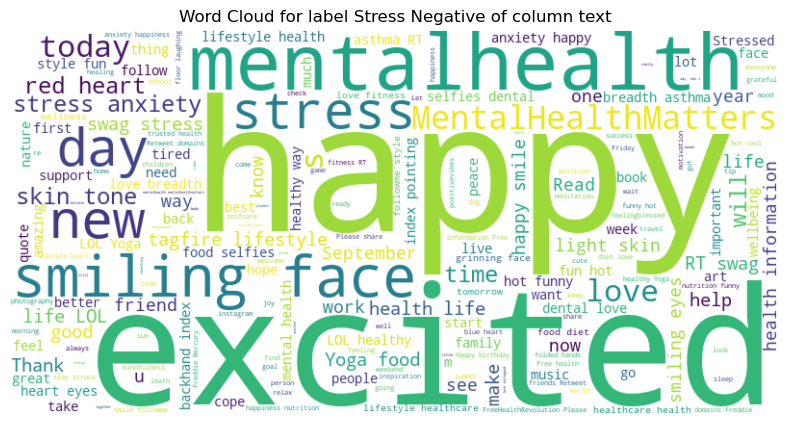

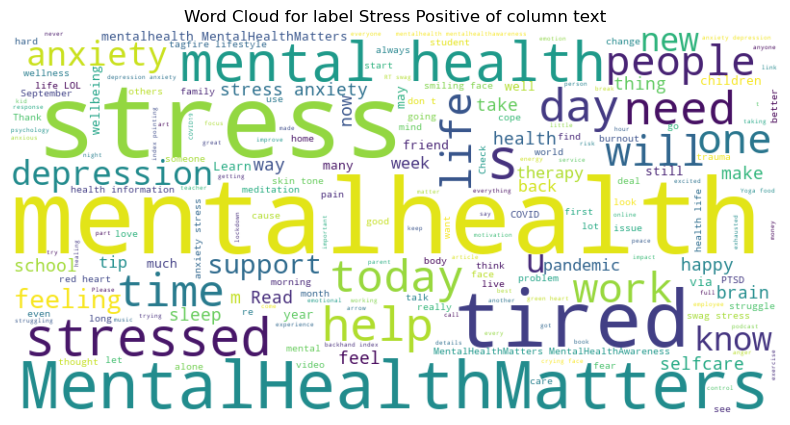

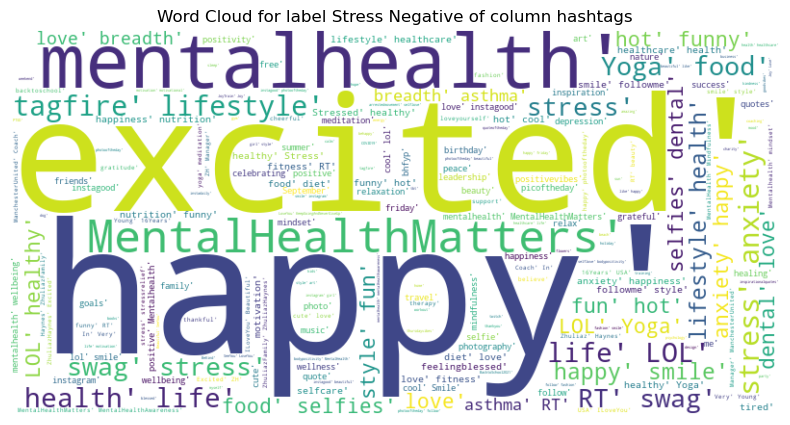

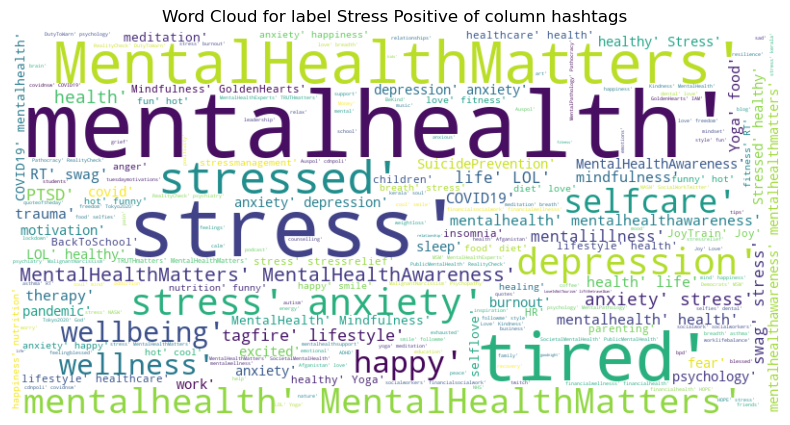

In [11]:
wordCloud('text', 0)
wordCloud('text', 1)

wordCloud('hashtags', 0)
wordCloud('hashtags', 1)

### Transforming the textual data into numerical matrix using count vectorizer class

In [12]:
count=CountVectorizer()
text = count.fit_transform(df['text'])
hashtags = count.fit_transform(df['hashtags'])

### Separating the targets (dependent var)

In [13]:
targets = df['labels']

### Creating a Multilayer Perceptron model to predict whether the person is stressed or not from the article

In [14]:
def MLP(col):
    inputs =col
    
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)

    # Implementing model with better parameter
    params = {
        'hidden_layer_sizes': [(10,10,10), (50,50,50)],
        'max_iter': [300, 400, 500]
    }
    
    mlp_clf = MLPClassifier(
        activation= 'relu',
        solver= 'adam',
        learning_rate= 'adaptive',
        early_stopping= True)
    
    mlp_clf_gsv = GridSearchCV(estimator=mlp_clf, param_grid=params)
    mlp_clf_gsv.fit(inputs_train, targets_train)
    
    mlp_clf_model = mlp_clf_gsv.best_estimator_
    mlp_clf_model.fit(inputs_train, targets_train)
    
    mlp_clf_train_score = (accuracy_score(targets_train, mlp_clf_model.predict(inputs_train)) * 100).round(2)
    mlp_clf_test_score = (accuracy_score(targets_test, mlp_clf_model.predict(inputs_test)) * 100).round(2)
    print("Train Accuracy score of the MLP Classifier model is:\t", (mlp_clf_train_score))
    print("Test Accuracy score of the MLP Classifier model is:\t", (mlp_clf_test_score))

In [15]:
print(f"\n\nAccuracy of the Multilayer Perceptron model build training in the column: text")
MLP(text)

print(f"\n\nAccuracy of the Multilayer Perceptron model build training in the column: hashtags")
MLP(hashtags)



Accuracy of the Multilayer Perceptron model build training in the column: text
Train Accuracy score of the MLP Classifier model is:	 97.83
Test Accuracy score of the MLP Classifier model is:	 84.31


Accuracy of the Multilayer Perceptron model build training in the column: hashtags
Train Accuracy score of the MLP Classifier model is:	 91.47
Test Accuracy score of the MLP Classifier model is:	 79.15


### Creating a Multinomial Naive Bayes Model to predict whether the person is stressed or not from the article

In [16]:
def MNB(col):
    inputs = col
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)
    
    multinomial_clf = MultinomialNB()
    multinomial_clf.fit(inputs_train, targets_train)
    
    multinomial_clf_train_score = (accuracy_score(targets_train, multinomial_clf.predict(inputs_train)) * 100).round(2)
    multinomial_clf_test_score = (accuracy_score(targets_test, multinomial_clf.predict(inputs_test)) * 100).round(2)

    print("Train Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_train_score))
    print("Test Accuracy score of the MNB Classifier model is:\t", (multinomial_clf_test_score))

In [17]:
print(f"\n\nAccuracy of the Multinomial NB Model build training in the column: text")
MNB(text)

print(f"\n\nAccuracy of the Multinomial NB Model build training in the column: hashtags")
MNB(hashtags)



Accuracy of the Multinomial NB Model build training in the column: text
Train Accuracy score of the MNB Classifier model is:	 89.91
Test Accuracy score of the MNB Classifier model is:	 82.29


Accuracy of the Multinomial NB Model build training in the column: hashtags
Train Accuracy score of the MNB Classifier model is:	 84.88
Test Accuracy score of the MNB Classifier model is:	 77.71


### Creating a Bernoulli Naive Bayes model to predict whether the person is stressed or not from the article

In [18]:
def BNB(col):
    inputs = col
    inputs_train, inputs_test, targets_train, targets_test = train_test_split(inputs, targets, test_size=0.2, random_state=1)
    
    bernoulli_clf = BernoulliNB()
    bernoulli_clf.fit(inputs_train, targets_train)
    
    bernoulli_clf_train_score = (accuracy_score(targets_train, bernoulli_clf.predict(inputs_train)) * 100).round(2)
    bernoulli_clf_test_score = (accuracy_score(targets_test, bernoulli_clf.predict(inputs_test)) * 100).round(2)
    
    # print(f"Accuracy of the Bernoulli NB Model build training in the column: {col}")
    print("Train Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_train_score))
    print("Test Accuracy score of the Bernoulli Naive Bayes model is:\t", (bernoulli_clf_test_score))

In [19]:
print(f"\n\nAccuracy of the Bernoulli Naive Bayes Model build training in the column: text")
BNB(text)

print(f"\n\nAccuracy of the Bernoulli Naive Bayes Model build training in the column: hashtags")
BNB(hashtags)



Accuracy of the Bernoulli Naive Bayes Model build training in the column: text
Train Accuracy score of the Bernoulli Naive Bayes model is:	 89.95
Test Accuracy score of the Bernoulli Naive Bayes model is:	 83.01


Accuracy of the Bernoulli Naive Bayes Model build training in the column: hashtags
Train Accuracy score of the Bernoulli Naive Bayes model is:	 81.38
Test Accuracy score of the Bernoulli Naive Bayes model is:	 76.47


### From the above results, it is clear that predicting whether the person is stressed or not based on the article is more accurate when the input text is given to the model build with Multilayer Perceptron